In [3]:
import pickle
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score

In [4]:
data_path = os.path.join("..","data")

## For Dyanmic Model Actual/Pred Ratio vs timestamp units.

In [5]:
y_actual = np.load(os.path.join(data_path, "test_labels.npy"))

In [6]:
y_actual.shape

(765, 500, 7, 1)

In [7]:
y_pred = np.load(os.path.join(data_path, "y_new.npy"))

In [8]:
y_pred.shape

(765, 500, 7, 1)

In [11]:
with open(os.path.join(data_path, "test_labels_765.pkl"),"rb") as f:
    hate_label=pickle.load(f)
assert len(hate_label)==len(y_pred)

In [12]:
print("Total hate labels = {}".format(sum(hate_label)))

Total hate labels = 18


In [8]:
hate_pred_dict = Counter()
non_hate_pred_dict = Counter()

hate_actual_dict = Counter()
non_hate_actual_dict = Counter()

for i in range(765):   
    for j in range(500):
        for k in range(7):
            #pred rewteet count >0.5 is yes, else no
            pred = y_pred[i][j][k][0]
            if pred>0.5:
                if hate_label[i]:
                    hate_pred_dict[k] += 1
                else:
                    non_hate_pred_dict[k] += 1
            #Actual retweeter count 0-no 1 yes
            act = y_actual[i][j][k][0]
            if act:
                if hate_label[i]:
                    hate_actual_dict[k] += 1
                else:
                    non_hate_actual_dict[k] +=1

In [9]:
print("HATE RETWEETERS")
for i in range(7):
    print("{}: Pred = {}, Actual = {}".format(i,hate_pred_dict[i],hate_actual_dict[i]))

HATE RETWEETERS
0: Pred = 4, Actual = 32
1: Pred = 1, Actual = 15
2: Pred = 7, Actual = 42
3: Pred = 9, Actual = 21
4: Pred = 17, Actual = 32
5: Pred = 150, Actual = 150
6: Pred = 6, Actual = 5


In [10]:
print("NON HATE RETWEETERS")
for i in range(7):
    print("{}: Pred = {}, Actual = {}".format(i,non_hate_pred_dict[i],non_hate_actual_dict[i]))

NON HATE RETWEETERS
0: Pred = 18, Actual = 977
1: Pred = 17, Actual = 474
2: Pred = 166, Actual = 1113
3: Pred = 255, Actual = 904
4: Pred = 598, Actual = 1303
5: Pred = 4771, Actual = 4829
6: Pred = 476, Actual = 446


In [11]:
hate_div=[]
non_hate_div=[]
for k in range(7):
    hate_div.append(hate_pred_dict[k]/hate_actual_dict[k])
    non_hate_div.append(non_hate_pred_dict[k]/non_hate_actual_dict[k])

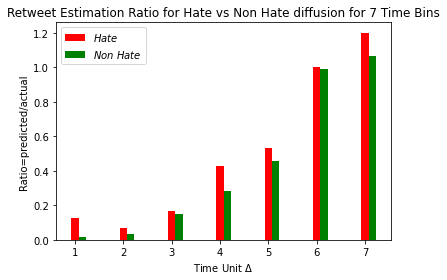

In [12]:
w = 0.15 # Shifting width
plt.bar(
    np.arange(1,8),
    hate_div,
    width=w,
    align="center",
    label="$Hate$",
    color="red"
    )
plt.bar(
    np.arange(1,8)+w,
    non_hate_div,
    width=w,
    align="center",
    label="$Non\ Hate$",
    color="green"
)
plt.legend()
plt.title("Retweet Estimation Ratio for Hate vs Non Hate diffusion for 7 Time Bins")
plt.ylabel("Ratio=predicted/actual")
plt.xlabel("Time Unit $\Delta$") 
plt.show()

### For user history and tfdif size variation

In [13]:
## For user history(150/100 retweetwers used) 0.65 is the old static data F1(on history=10), we report 0.71 after we learn that it is the highest.

static_user_hist_abal=[0.65,
0.68,
0.7,
0.64,
0.66]

dynamic_user_hist_abal=[0.92,
0.9,
0.93,
0.89,
0.92]

hist_size=np.array([10, 20,30,50,100],dtype=int)

static_tfidf_abal=[0.65,0.64,
0.66]

dynamic_tfidf_abal=[0.92,0.91,
0.92]

tfidf_size=np.array([300,600,1000],dtype=int)

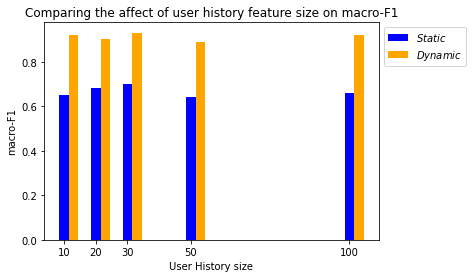

In [15]:
w = 1 # Shifting width
plt.xticks(hist_size)
plt.bar(
    hist_size,
    static_user_hist_abal,
    width=w*3,
    align="center",
    label="$Static$",
    color="blue"
    )
plt.bar(
    hist_size+w*3,
    dynamic_user_hist_abal,
    width=w*3,
    align="center",
    label="$Dynamic$",
    color="orange"
)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title("Comparing the affect of user history feature size on macro-F1")
plt.ylabel("macro-F1")
plt.xlabel("User History size") 
plt.show()

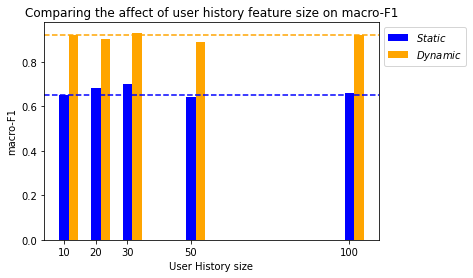

In [16]:
w = 1 # Shifting width
plt.xticks(hist_size)
plt.bar(
    hist_size,
    static_user_hist_abal,
    width=w*3,
    align="center",
    label="$Static$",
    color="blue"
    )
plt.bar(
    hist_size+w*3,
    dynamic_user_hist_abal,
    width=w*3,
    align="center",
    label="$Dynamic$",
    color="orange"
)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title("Comparing the affect of user history feature size on macro-F1")
plt.ylabel("macro-F1")
plt.xlabel("User History size")
plt.axhline(y=0.65,color='blue',linestyle='--')
plt.axhline(y=0.92,color='orange',linestyle='--')
plt.show()

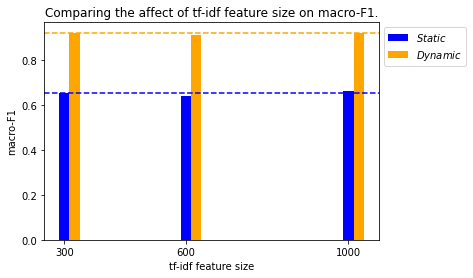

In [17]:
w = 5 # Shifting width
plt.xticks(tfidf_size)
plt.bar(
    tfidf_size,
    static_tfidf_abal,
    width=w*5,
    align="center",
    label="$Static$",
    color="blue"
    )
plt.bar(
    tfidf_size+w*5,
    dynamic_tfidf_abal,
    width=w*5,
    align="center",
    label="$Dynamic$",
    color="orange"
)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title("Comparing the affect of tf-idf feature size on macro-F1.")
plt.ylabel("macro-F1")
plt.xlabel("tf-idf feature size") 
plt.axhline(y=0.65,color='blue',linestyle='--')
plt.axhline(y=0.92,color='orange',linestyle='--')
plt.show()

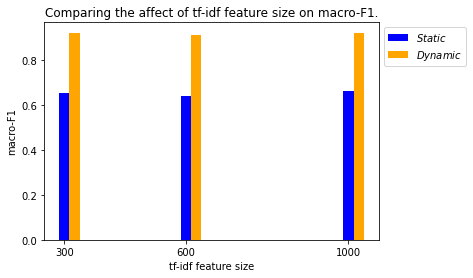

In [18]:
w = 5 # Shifting width
plt.xticks(tfidf_size)
plt.bar(
    tfidf_size,
    static_tfidf_abal,
    width=w*5,
    align="center",
    label="$Static$",
    color="blue"
    )
plt.bar(
    tfidf_size+w*5,
    dynamic_tfidf_abal,
    width=w*5,
    align="center",
    label="$Dynamic$",
    color="orange"
)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title("Comparing the affect of tf-idf feature size on macro-F1.")
plt.ylabel("macro-F1")
plt.xlabel("tf-idf feature size") 
# plt.axhline(y=0.68,color='blue',linestyle='--')
# plt.axhline(y=0.92,color='orange',linestyle='--')
plt.show()

### For Static Cascade Ration Spread

In [44]:
y_actual = np.load("y_actual_stat_best.npy")
y_pred = np.load("y_pred_stat_best.npy")

In [47]:
size_count=Counter()
size_map={}
# for each_row in y_actual:
for i in range(765):
    sum_=y_actual[i].sum()
    size_count[sum_]+=1

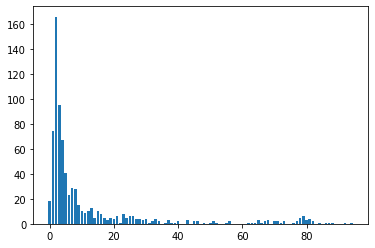

In [50]:
size_count=dict(size_count)
plt.bar(list(size_count.keys()),list(size_count.values()))
plt.show()

In [51]:
size_bucket={} #post manual inspection
size_bucket['1']=size_count[1]
size_bucket['2']=size_count[2]
size_bucket['3']=size_count[3]
size_bucket['4']=size_count[4]
size_bucket['5']=size_count[5]
size_bucket['6-8']=sum([size_count.get(x,0) for x in range(6,9)])
size_bucket['9-15']=sum([size_count.get(x,0) for x in range(9,16)])
size_bucket['16-30']=sum([size_count.get(x,0) for x in range(16,31)])
size_bucket['31-64']=sum([size_count.get(x,0) for x in range(31,65)])
size_bucket['65-94']=sum([size_count.get(x,0) for x in range(65,94)])
plt.bar(list(size_bucket.keys()),list(size_bucket.values()))
plt.show()

In [55]:
size_map={x:[] for x in size_bucket}
for i in range(765):
    size_ = y_actual[i].sum()
    if size_==1:
        size_map['1'].append(i)
    elif size_==2:
        size_map['2'].append(i)
    elif size_==3:
        size_map['3'].append(i)
    elif size_==4:
        size_map['4'].append(i)
    elif size_==5:
        size_map['5'].append(i)
    elif 6<=size_<=8:
        size_map['6-8'].append(i)
    elif 9<=size_<=15:
        size_map['9-15'].append(i)
    elif 16<=size_<=30:
        size_map['16-30'].append(i)
    elif 31<=size_<=64:
        size_map['31-64'].append(i)
    elif 64<=size_<=94:
        size_map['65-94'].append(i)

In [57]:
size_f1={x:0 for x in size_map}
size_f1
for each_size in size_map:
    temp_actual= []
    temp_pred = []
    for each_id in size_map[each_size]:
        pred = y_pred[each_id]
        act = y_actual[each_id]
        assert len(pred)==len(act)
        for j in range(500):
            p = pred[j][0]
            if p<0.5:
                temp_pred.append(0)
            else:
                temp_pred.append(1)
            temp_actual.append(act[j][0])
    assert len(temp_actual)==len(temp_pred)
    mf1 = f1_score(temp_actual, temp_pred, average='macro')
    print(each_size, len(temp_actual), mf1)
    size_f1[each_size]=mf1

1 37000 0.5918385214433612
2 83000 0.629610334043949
3 47500 0.5809089552709711
4 33500 0.5863115196983492
5 20500 0.6002416943832886
6-8 40000 0.593612405938418
9-15 36000 0.6259181777335928
16-30 36000 0.6835282057783203
31-64 17500 0.6591899581592126
65-94 22500 0.7265821001812967


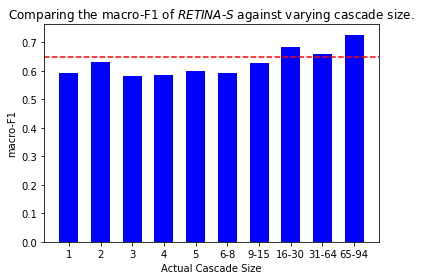

In [58]:
w = 0.6
plt.bar(list(size_f1.keys()),list(size_f1.values()),color="blue",width=w)
plt.axhline(y=0.65,color='red',linestyle='--')
plt.title("Comparing the macro-F1 of $RETINA$-$S$ against varying cascade size.")
plt.ylabel("macro-F1")
plt.xlabel("Actual Cascade Size") 
plt.show()

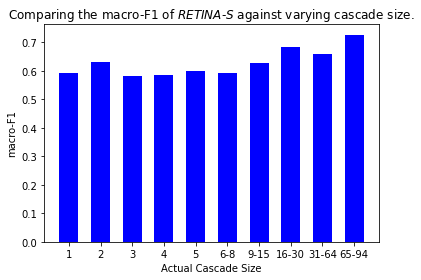

In [59]:
w = 0.6
plt.bar(list(size_f1.keys()),list(size_f1.values()),color="blue",width=w)
# plt.axhline(y=0.65,color='red',linestyle='--')
plt.title("Comparing the macro-F1 of $RETINA$-$S$ against varying cascade size.")
plt.ylabel("macro-F1")
plt.xlabel("Actual Cascade Size") 
plt.show()

### For News Size
* User Hist size = 30, tfidf=300

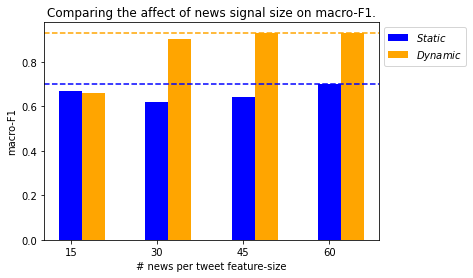

In [19]:
news_size=np.array([15,30,45,60],dtype=int)
static_news=[.67,.62,.64,.70]
dynamic_news=[0.66,0.9,0.93,0.93]
w = 2 # Shifting width
plt.xticks(news_size)
plt.bar(
    news_size,
    static_news,
    width=w*2,
    align="center",
    label="$Static$",
    color="blue"
    )
plt.bar(
    news_size+w*2,
    dynamic_news,
    width=w*2,
    align="center",
    label="$Dynamic$",
    color="orange"
)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.title("Comparing the affect of news signal size on macro-F1.")
plt.ylabel("macro-F1")
plt.xlabel("# news per tweet feature-size") 
plt.axhline(y=0.7,color='blue',linestyle='--')
plt.axhline(y=0.93,color='orange',linestyle='--')
plt.show()